In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Train Set

In [ ]:
train_filename_set1 = []

set1 = '/kaggle/input/super-ai-engineer-2021-font-recognition/train/set1/'
set2 = '/kaggle/input/super-ai-engineer-2021-font-recognition/train/set2/'
os.makedirs('./working/train_new1/')
saveTrainImage1 = './working/train_new1/' # Set1+Set2

set1_paths = os.listdir(set1)
set2_paths = os.listdir(set2)
len(set1_paths),len(set2_paths)

In [ ]:
import cv2
import json
import gc

In [ ]:
labels = []
images = []

In [ ]:
set1_paths = set1_paths[0:500]
index = 0
for i in tqdm(range(len(set1_paths))):
    path = set1_paths[i]
    f = open(f"{set1}/{path}/gt_text.json")
    sample_json = json.load(f)
    sample_image = cv2.imread(f"{set1}/{path}/image.png") 
    
    for json_data in sample_json:
        rect = json_data['rect']
        style = json_data['style']
        
        if((int(rect['x']) <= sample_image.shape[1]) and ((int(rect['x'])+int(rect['width'])) <= sample_image.shape[1]) and
        (int(rect['y']) <= sample_image.shape[0]) and ((int(rect['y'])+int(rect['height']) <= sample_image.shape[0])) and
        (int(rect['width']) > 0) and (int(rect['height']) > 0)):
           
            x = int(rect['x']) 
            y = int(rect['y'])
            w = int(rect['width'])
            h = int(rect['height'])

            image = sample_image[y:y+h,x:x+w].copy()
            image = cv2.resize(image,(75,75),interpolation = cv2.INTER_AREA)
            
            
            family = style['fontFamily']
            size = style['fontSize']
            font_style = style['fontStyle']
            weight = style['fontWeight']
            varient = style['fontVarient']
            text = json_data['text']
            
            document_id = f"set1-{path}"
            
#             plt.imshow(image)
#             plt.show()
            if len(image) != 0:
                images.append(image)
                filename = str(document_id)+str(index)+'.png'
                labels.append({'family': family, \
                               'size': size, \
                               'font_style': font_style, \
                               'weight': weight, \
                               'document_id': document_id, \
                               'varient': varient, \
                               'text': text, \
                               'filename': filename
                              })
#                 print(saveTrainImage1+filename)
                cv2.imwrite(saveTrainImage1+filename, image)
#                 print(filename,document_id,family,size,font_style,weight,x,y,w,h,sample_image.shape[1],sample_image.shape[0])
               
            index = index+1


In [ ]:
# len(os.listdir(saveTrainImage1))

In [ ]:
index = 0
set2_paths = set2_paths[0:500]
for i in tqdm(range(len(set2_paths))):
    path = set2_paths[i]
    f = open(f"{set2}/{path}/gt_text.json")
    sample_json = json.load(f)
    sample_image = cv2.imread(f"{set2}/{path}/image.png") 
    
    for json_data in sample_json:
        rect = json_data['rect']
        style = json_data['style']
        
        if((int(rect['x']) <= sample_image.shape[1]) and ((int(rect['x'])+int(rect['width'])) <= sample_image.shape[1]) and
        (int(rect['y']) <= sample_image.shape[0]) and ((int(rect['y'])+int(rect['height']) <= sample_image.shape[0])) and
        (int(rect['width']) > 0) and (int(rect['height']) > 0) ):
                    
            x = int(rect['x']) 
            y = int(rect['y'])
            w = int(rect['width'])
            h = int(rect['height'])
            
            image = sample_image[y:y+h,x:x+w].copy()
            
#             print(i,x,y,w,h,sample_image.shape[1],sample_image.shape[0])
#             plt.imshow(image)
#             plt.show()
            
            image = cv2.resize(image,(75,75),interpolation = cv2.INTER_AREA)
            
            family = style['fontFamily']
            size = style['fontSize']
            font_style = style['fontStyle']
            weight = style['fontWeight']
            varient = style['fontVarient']
            text = json_data['text']
            
            document_id = f"set2-{path}"

#             print(i,document_id,family,size,font_style,weight,x,y,w,h,sample_image.shape[1],sample_image.shape[0])
#             plt.imshow(image)
#             plt.show()

            if len(image) != 0:
                images.append(image)
                filename = str(document_id)+str(index)+'.png'
                labels.append({'family': family, \
                               'size': size, \
                               'font_style': font_style, \
                               'weight': weight, \
                               'document_id': document_id, \
                               'varient': varient, \
                               'text': text, \
                               'filename': filename
                              })
#                 print(saveTrainImage1+filename)
                cv2.imwrite(saveTrainImage1+filename, image)
#                 print(filename,document_id,family,size,font_style,weight,x,y,w,h,sample_image.shape[1],sample_image.shape[0])
               
            index = index+1


In [ ]:
# len(os.listdir(saveTrainImage1))

In [ ]:
len(images),len(labels)

In [ ]:
labels[3]

In [ ]:
plt.imshow(images[3])

In [ ]:
# for i in images:
#     plt.imshow(i)
#     plt.show()

In [ ]:
images_resize = []
# for img in images:
# #     resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#     images_resize.append(cv2.resize(img,(75,75),interpolation = cv2.INTER_AREA))

images_resize = images

In [ ]:
images_resize[100].shape , len(images_resize)

In [ ]:
plt.imshow(images[10])
images[10].shape[1],images[10].shape[0]

In [ ]:
plt.imshow(images_resize[10])
images_resize[10].shape[1],images_resize[10].shape[0]

Pre Train

In [ ]:
label_family = []
for label in labels:
    label_family.append(label['family'])
# label_family

In [ ]:
np.array(label_family)

In [ ]:
family_type = ('Angsana_New', 'Cordia_New', 'DM_Shining_Star_Regular', 'FC_Knomphing_Regular', 'fonttintin', 'Kunlasatri', 'TH_Chakra_Petch', 'TH_Charm_of_AU', 'TH_Mali_Grade6', 'TH_Sarabun')
family_type_df = pd.DataFrame(family_type, columns=['family_type'])
family_type_df

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)

# enc_df = enc.fit_transform(family_type_df[['family_type']]).toarray()
label_family_df = enc.fit_transform(np.array(label_family).reshape((-1,1))).toarray()

label_family_df , len(label_family_df)

In [ ]:
index_family = enc.inverse_transform(label_family_df)
index_family , len(index_family)

In [ ]:
# images_resize_df = np.array(images_resize)/ 255
images_resize_df = np.array(images_resize)
images_resize_df.shape

In [ ]:
# del images_resize , images

# import gc
# gc.collect()

In [ ]:
images_resize_df[0]

2. ResNet50

[https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/](http://)

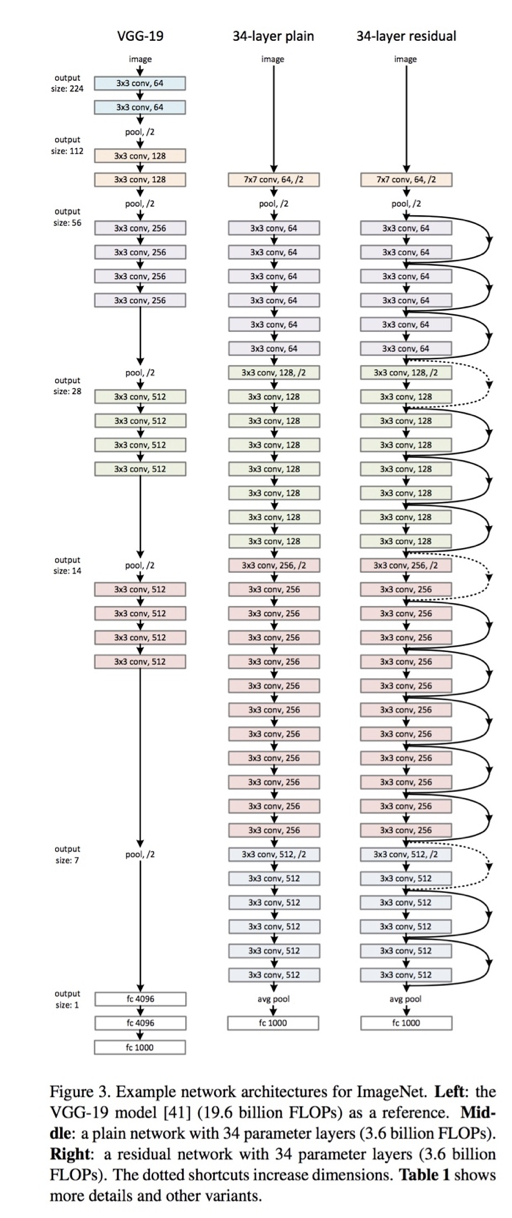

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_resize_df, label_family_df, test_size=0.33, random_state=42,shuffle=True)

In [ ]:
# del images_resize_df ,label_family_df

# import gc
# gc.collect()

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape , X_train.shape[0]

In [ ]:
y_train[0]

---------------------------------------------------------------------------------------------------------------------------------

------------------------------------

Pre-Train - 2

In [ ]:
# Fixed for our Cats & Dogs classes
NUM_CLASSES = 10

# Fixed for Cats & Dogs color images
CHANNELS = 3

IMAGE_Width = 75
IMAGE_Heigth = 75
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'
resnet_weights_path='imagenet'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 250
STEPS_PER_EPOCH_VALIDATION = 250

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 32
BATCH_SIZE_VALIDATION = 32

# Using 1 to easily manage mapping between test_generator & prediction for submission preparation
BATCH_SIZE_TESTING = 32

STEPS_PER_EPOCH_TRAINING

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import tensorflow.keras.layers as layers

from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np
### 
### Below systax is available with TensorFlow 1.11 onwards but this upgrade is not available for Kaggle kernel yet
###
#import tensorflow as tf
#print(tf.__version__)
#import tensorflow as tf
#from tf.keras.applications import ResNet50
#from tf.keras.models import Sequential

In [ ]:
resnet50_imagenet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(75, 75, 3))

#Flatten output layer of Resnet
flattened = tf.keras.layers.Flatten()(resnet50_imagenet_model.output)

#Fully connected layer 1
fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)

#Fully connected layer, output layer
fc2 = tf.keras.layers.Dense(10, activation='softmax', name="AddedDense2")(fc1)

model = tf.keras.models.Model(inputs=resnet50_imagenet_model.input, outputs=fc2)

In [ ]:
IMG_SIZE = 75

#Still not talking about our train/test data or any pre-processing.

model = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is


model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = resnet_weights_path))


# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

# Say not to train first layer (ResNet) model as it is already trained
model.layers[0].trainable = False


In [ ]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(learning_rate = 0.001, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [ ]:
model.summary()

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale = 1.0/255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# batch_size_ = 64
# train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size_)
# validation_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size_)


from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

# image_size = IMAGE_RESIZE
IMAGE_Width = 75
IMAGE_Heigth = 75

# preprocessing_function is applied on each image but only after re-sizing & augmentation (resize => augment => pre-process)
# Each of the keras.application.resnet* preprocess_input MOSTLY mean BATCH NORMALIZATION (applied on each batch) stabilize the inputs to nonlinear activation functions
# Batch Normalization helps in faster convergence
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# flow_From_directory generates batches of augmented data (where augmentation can be color conversion, etc)
# Both train & valid folders must have NUM_CLASSES sub-folders

train_datagen = ImageDataGenerator(rescale = 1.0/255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# train_datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
# test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train,
        batch_size=BATCH_SIZE_TRAINING)

validation_generator = test_datagen.flow(X_test, y_test,
        batch_size=BATCH_SIZE_VALIDATION) 

In [ ]:
# Max number of steps that these generator will have opportunity to process their source content
# len(train_generator) should be 'no. of available train images / BATCH_SIZE_TRAINING'
# len(valid_generator) should be 'no. of available train images / BATCH_SIZE_VALIDATION'
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))

In [ ]:
# Early stopping & checkpointing the best model in ../working dir & restoring that as our model for prediction
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = './working/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')


In [ ]:
# resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = steps_per_epoch_, epochs = 10)
resnet_history = model.fit(train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION)

In [ ]:
# Grid Search is an ideal candidate for distributed machine learning
# Pseudo code for hyperparameters Grid Search

'''
from sklearn.grid_search import ParameterGrid
param_grid = {'epochs': [5, 10, 15], 'steps_per_epoch' : [10, 20, 50]}

grid = ParameterGrid(param_grid)

# Accumulate history of all permutations (may be for viewing trend) and keep watching for lowest val_loss as final model
for params in grid:
    print(params)
'''

fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)
model.load_weights("./working/best.hdf5")

Predict

In [ ]:
# img = image.load_img(img_path, target_size=(75, 75))
# predictions = model.predict(processed_image) 